# Компьютерное зрение
Кудрявцев Александр 381803-2

In [1]:
import cv2
from matplotlib import pyplot as plt

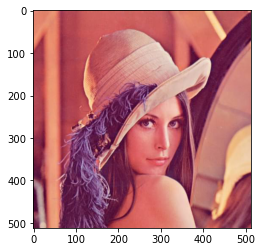

In [2]:
image_path = 'lena.jpg'
img = cv2.imread(image_path)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

## 1. Найти лицо на изображении.

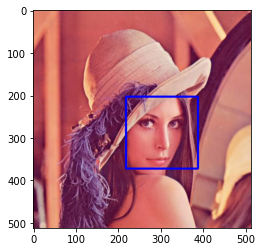

True

In [3]:
# Для детектирования лиц используем каскады Хаара
faceCascade = cv2.CascadeClassifier(r'F:\Programms\anaconda\Library\etc\haarcascades\haarcascade_frontalface_default.xml')

img1 = cv2.imread(image_path)
imgray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
faces = faceCascade.detectMultiScale(imgray, minNeighbors=3, minSize=(25, 25))
for (x, y, w, h) in faces:
    cv2.rectangle(img1, (x, y), (x+w, y+h), (255, 0, 0), 3)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.show()

cv2.imwrite('1.jpg', img1)

## 2. Отступить на 10% от границ лица и получить этот фрагмент изображения.

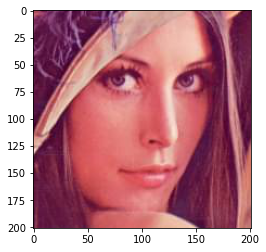

True

In [4]:
for (x, y, w, h) in faces:
    x1 = x - int(w * 0.1)
    x2 = x + int(w * 1.1)
    y1 = y - int(h * 0.1)
    y2 = y + int(h * 1.1)
img2 = img[x1:x2,y1:y2]
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.show()

cv2.imwrite('2.jpg', img2)

## 3. Получить бинарное изображение краев (границ объектов).

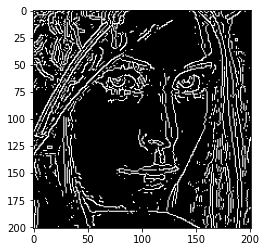

True

In [5]:
imgray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

img3 = cv2.Canny(imgray, 60, 60)
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
plt.show()

cv2.imwrite('3.jpg', img3)

## 4. Удалить мелкие границы.

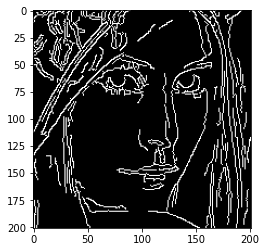

True

In [14]:
import numpy as np
contours, thresh = cv2.findContours(img3, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

img_tmp = []
for i in range(len(contours)):
    min_rect = cv2.minAreaRect(contours[i])
    if min_rect[1][0] >= 10 or min_rect[1][1]>=10:
        img_tmp.append(contours[i])
img4 = np.zeros(imgray.shape, dtype='uint8')
cv2.drawContours(img4, img_tmp, -1, (255, 255, 255), 1) 

plt.imshow(cv2.cvtColor(img4, cv2.COLOR_BGR2RGB))
plt.show()

cv2.imwrite('4.jpg', img4)

## 5. Применить морфологическую операцию наращивания (размер структурирующего элемента 5 x 5).

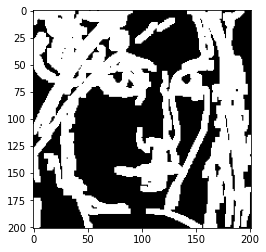

True

In [15]:
kernel = np.ones((5, 5), 'uint8')

img5 = cv2.dilate(img4, kernel, iterations=1)
plt.imshow(cv2.cvtColor(img5, cv2.COLOR_BGR2RGB))
plt.show()

cv2.imwrite('5.jpg', img5)

## 6. Сгладить полученное изображение краев гауссовским фильтром 5 на 5. Получить нормализованное изображение M, где все пиксели от 0 до 1.

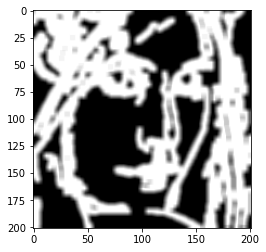

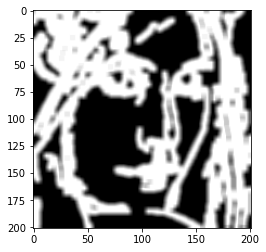

True

In [16]:
img6 = cv2.GaussianBlur(img5,(5,5), cv2.BORDER_DEFAULT)

plt.imshow(cv2.cvtColor(img6, cv2.COLOR_BGR2RGB))
plt.show()

M = norm_img6 = cv2.normalize(img6, None, 0, 1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
plt.imshow(cv2.cvtColor(M, cv2.COLOR_BGR2RGB))
plt.show()


cv2.imwrite('6.jpg', img6)
cv2.imwrite('M.jpg', M)

## 7. Получить изображение F1 лица с примененной билатеральной фильтрацией.

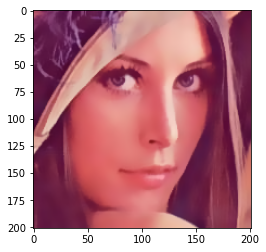

True

In [9]:
F1 = cv2.bilateralFilter(img2, 10, 45, 45)

plt.imshow(cv2.cvtColor(F1, cv2.COLOR_BGR2RGB))
plt.show()

cv2.imwrite('F1.jpg', F1)

## 8. Получить изображение F2 лица с улучшенной четкостью/контрастностью.

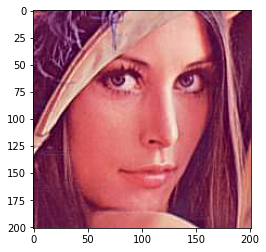

True

In [10]:
'''
kernel1 = np.ones((3,3)) / 9
kernel2 = np.array([[0,0,0], [0,2,0], [0,0,0]])
F2 = cv2.filter2D(img2, -1, kernel2-kernel1)

plt.imshow(cv2.cvtColor(F2, cv2.COLOR_BGR2RGB))
plt.show()
'''
# Другой способ
blurred = cv2.GaussianBlur(img2,(5,5),cv2.BORDER_DEFAULT)
F2 = cv2.addWeighted(img2, 1.7, blurred, -0.7, 0)

plt.imshow(cv2.cvtColor(F2, cv2.COLOR_BGR2RGB))
plt.show()

cv2.imwrite('F2.jpg', F2)

## 9. Осуществить финальную фильтрацию
По формуле Result[x,y,c] = M[x,y]*F2[x,y,c]+(1-M[x,y])*F1[x,y,c] где x=1..width, y=1..height, c = 1..3.

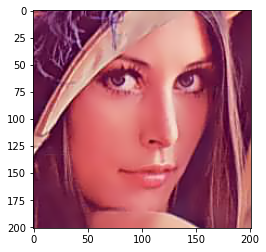

True

In [17]:
one = np.ones(3)
result = np.zeros(F1.shape, dtype='uint8')
height = M.shape[0]
width = M.shape[1]
for i in range(height):
    for j in range(width):
        result[i][j] = M[i][j]*F2[i][j] + (one - M[i][j])*F1[i][j]

plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()

cv2.imwrite('res.jpg', result)